In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!pip install tensorflow

In [2]:
import tensorflow
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full , Y_train_full), (X_test , Y_test)= fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
 class_names = ["T-shirt/Top","Trouser", "Pullover" ,"Dress", "Coat", "Sandel", "Shirt", "Sneaker","Bag", "Ankel boot"]
class_names[Y_train_full[0]]

'Ankel boot'

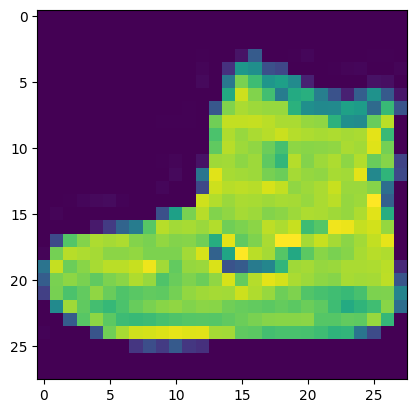

In [5]:

plt.imshow(X_train_full[0])

In [6]:
Y_train_full[0]

9

In [7]:
X_train_n = X_train_full/ 255.
X_test_n = X_test / 255.

In [8]:
X_valid , X_train =   X_train_n[:5000] , X_train_n[5000:]
Y_valid , Y_train =  Y_train_full[:5000] , Y_train_full[5000:]
X_test = X_test_n

In [9]:
np.random.seed(42)
tensorflow.random.set_seed(42)

In [10]:
model = tensorflow.keras.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300 , activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10 , activation = "softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
import pydot

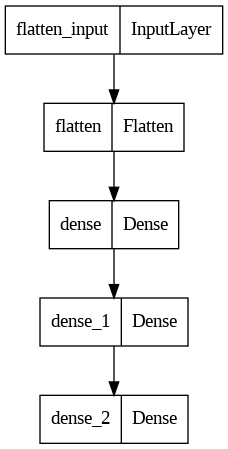

In [13]:
keras.utils.plot_model(model)

In [14]:
weights, biases = model.layers[1].get_weights()

In [15]:
weights

array([[-0.01726487,  0.00573628, -0.02007898, ...,  0.04105433,
         0.00455139, -0.01718839],
       [-0.06965244, -0.01826461, -0.01483351, ..., -0.01512345,
        -0.01802718, -0.06154654],
       [ 0.04841553,  0.0703226 , -0.00623459, ..., -0.02717774,
         0.06075059,  0.00635407],
       ...,
       [ 0.03494407, -0.00319677,  0.05825166, ..., -0.01898857,
         0.06342557, -0.05240883],
       [ 0.01906417,  0.01147586,  0.06641279, ...,  0.02599518,
        -0.01459162,  0.0506582 ],
       [-0.07307895, -0.00532808, -0.03951433, ..., -0.02467041,
        -0.04528236,  0.07193127]], dtype=float32)

In [16]:
weights.shape

(784, 300)

In [17]:
biases.shape

(300,)

In [18]:
np.random.seed(5)

In [19]:
np.random.rand(5)

array([0.22199317, 0.87073231, 0.20671916, 0.91861091, 0.48841119])

In [ ]:
np.random.rand(5)

array([0.61174386, 0.76590786, 0.51841799, 0.2968005 , 0.18772123])

In [20]:
np.random.seed(42)

In [21]:
np.random.rand(42)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258,
       0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497,
       0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914,
       0.61185289, 0.13949386, 0.29214465, 0.36636184, 0.45606998,
       0.78517596, 0.19967378, 0.51423444, 0.59241457, 0.04645041,
       0.60754485, 0.17052412, 0.06505159, 0.94888554, 0.96563203,
       0.80839735, 0.30461377, 0.09767211, 0.68423303, 0.44015249,
       0.12203823, 0.49517691])

In [22]:
np.random.rand(42)

array([0.03438852, 0.9093204 , 0.25877998, 0.66252228, 0.31171108,
       0.52006802, 0.54671028, 0.18485446, 0.96958463, 0.77513282,
       0.93949894, 0.89482735, 0.59789998, 0.92187424, 0.0884925 ,
       0.19598286, 0.04522729, 0.32533033, 0.38867729, 0.27134903,
       0.82873751, 0.35675333, 0.28093451, 0.54269608, 0.14092422,
       0.80219698, 0.07455064, 0.98688694, 0.77224477, 0.19871568,
       0.00552212, 0.81546143, 0.70685734, 0.72900717, 0.77127035,
       0.07404465, 0.35846573, 0.11586906, 0.86310343, 0.62329813,
       0.33089802, 0.06355835])

In [23]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [24]:
model_history = model.fit(X_train ,Y_train ,epochs = 30 , validation_data=(X_valid , Y_valid))

Epoch 1/30
1719/1719 [==============================] - 16s 9ms/step - loss: 0.7285 - accuracy: 0.7594 - val_loss: 0.5188 - val_accuracy: 0.8258
Epoch 2/30
1719/1719 [==============================] - 19s 11ms/step - loss: 0.4906 - accuracy: 0.8273 - val_loss: 0.4371 - val_accuracy: 0.8500
Epoch 3/30
1719/1719 [==============================] - 20s 12ms/step - loss: 0.4448 - accuracy: 0.8429 - val_loss: 0.5340 - val_accuracy: 0.8000
Epoch 4/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4182 - accuracy: 0.8538 - val_loss: 0.3993 - val_accuracy: 0.8592
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4001 - accuracy: 0.8593 - val_loss: 0.3797 - val_accuracy: 0.8670
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3817 - accuracy: 0.8648 - val_loss: 0.3767 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3696 - accuracy: 0.8695 - val_loss: 0.3656 - val_a

In [25]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [26]:
model_history.history


{'loss': [0.7284744381904602,
  0.4905520975589752,
  0.44477808475494385,
  0.4181807041168213,
  0.40008053183555603,
  0.3816803991794586,
  0.369559645652771,
  0.3583255410194397,
  0.34785550832748413,
  0.33869147300720215,
  0.330091655254364,
  0.32132259011268616,
  0.3136644959449768,
  0.30765023827552795,
  0.29955407977104187,
  0.29473385214805603,
  0.288608580827713,
  0.28259846568107605,
  0.2777547836303711,
  0.2722904682159424,
  0.26673635840415955,
  0.2621709704399109,
  0.2575533986091614,
  0.2536803185939789,
  0.2488878220319748,
  0.24486857652664185,
  0.24120280146598816,
  0.23780657351016998,
  0.23325634002685547,
  0.23027199506759644],
 'accuracy': [0.7594181895256042,
  0.8273454308509827,
  0.8429272770881653,
  0.8537999987602234,
  0.8593454360961914,
  0.8648181557655334,
  0.869454562664032,
  0.8725454807281494,
  0.8763818144798279,
  0.8788545727729797,
  0.8821818232536316,
  0.8844727277755737,
  0.8890363574028015,
  0.888909101486206,
 

<function matplotlib.pyplot.show(close=None, block=None)>

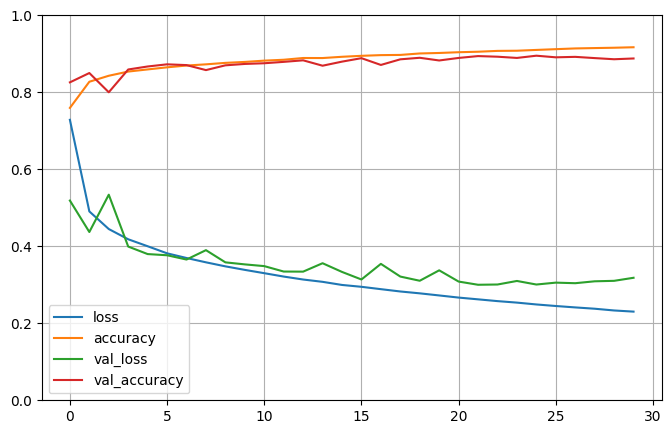

In [27]:
pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show


In [28]:
model.evaluate(X_test , Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3452 - accuracy: 0.8779


[0.34521132707595825, 0.8779000043869019]

In [29]:
X_new = X_test[:3]

In [30]:
y_prob = model.predict(X_new)
y_prob.round(2)

1/1 [==============================] - 0s 249ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [38]:
y_pred = np.argmax(model.predict(X_new),axis=1)
y_pred

1/1 [==============================] - 0s 40ms/step


array([9, 2, 1])

In [40]:
np.array(class_names)[y_pred]

array(['Ankel boot', 'Pullover', 'Trouser'], dtype='<U11')

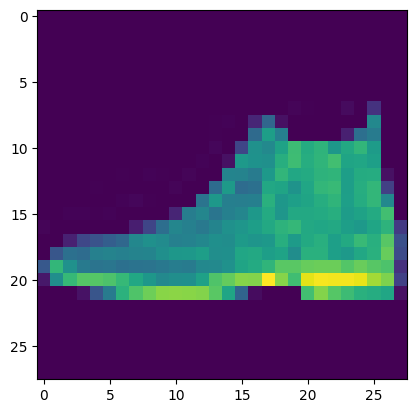

In [42]:
plt.imshow(X_new[0])

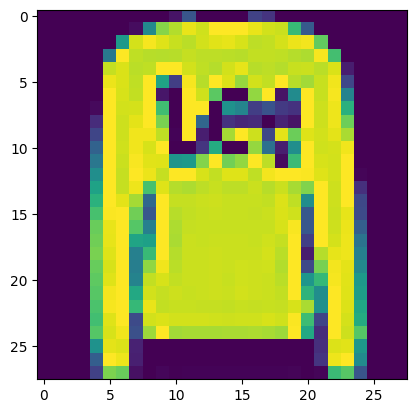

In [43]:
plt.imshow(X_new[1])